# Testes de Hipóteses

In [85]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
#from vega_datasets import data
import seaborn as sns
sns.set()

In [86]:
# Tamanho default das figuras
matplotlib.rcParams['figure.figsize'] = (15.0, 9.0)

In [87]:
# Load gun violence dataset and gun laws dataset
gun_violence = pd.read_csv('../databases/gun_violence_clean.zip', compression='zip')
gun_law = pd.read_csv('../databases/gun_laws.zip', compression='zip')
population = pd.read_csv('../databases/population.zip', compression='zip')

## Teste 1
Hipotese nula: Leis não afetam o número de incidentes ou mortos e/ou feridos.

Hipotese alternativa: Leis afetam o número de incidentes ou mortos e/ou feridos.

In [88]:
gun_violence = gun_violence[['incident_id', 'state', 'n_killed', 'n_injured', 'year', 'month', 'day']]
gun_violence = gun_violence[~gun_violence['year'].isin(['2013', '2018'])]
glaw = gun_law.iloc[:, 1:]
population = population[['2014', '2015', '2016', '2017']]

pop = population.reset_index().drop('index', axis=1)

incidents_state = gun_violence.groupby('state')\
                  .agg({'n_injured':'sum', 'incident_id':'count', 'n_killed':'sum'})\
                  .rename(columns={'incident_id':'number_of_incidents'})\
                  .sort_values('state')\
                  .reset_index()
# Join the dataframes
states = pd.concat([incidents_state, pop, glaw], axis=1, sort=False, join='inner')
# Population mean 
states['mean_pop'] = ((states['2014'] + states['2015'] + states['2016'] +states['2017'])/4)
# Porcents per 100k people
states['porcent_killed'] = (states['n_killed']/ states['mean_pop']) * 100000
states['porcent_incidents'] = (states['number_of_incidents']/ states['mean_pop']) * 100000
states['porcent_injured'] = (states['n_injured']/ states['mean_pop']) * 100000
# Column counting the number of laws a state has adopted
states['total_leis'] = (states.iloc[:, 8:15].sum(axis=1))

In [72]:
states

,state,n_injured,number_of_incidents,n_killed,2014,2015,2016,2017,Red Flag Laws,Relinquishment Laws,Assault Weapon Ban,High-Capacity Magazine ban,Prohibition for high-risk individuals,Prohibitions for individual with domestic violence covictions,Mandatory universal background checks,mean_pop,porcent_killed,porcent_incidents,porcent_injured,total_leis
0,Alabama,614,1411,804,4842481,4853160,4864745,4875120,0,0,0,0,1,1,0,4858876.50,16.547035,29.039635,12.636666,2
1,Alaska,105,557,153,736307,737547,741504,739786,0,0,0,0,1,0,0,738786.00,20.709651,75.393957,14.212505,1
2,Arizona,323,776,550,6733840,6833596,6945452,7048876,0,0,0,0,1,1,0,6890441.00,7.982073,11.261979,4.687654,2
3,Arkansas,511,993,378,2967726,2978407,2990410,3002997,0,0,0,0,1,0,0,2984885.00,12.663804,33.267613,17.119588,1
4,California,1861,5180,2265,38625139,38953142,39209127,39399349,1,1,1,1,1,1,1,39046689.25,5.800748,13.266170,4.766089,7
5,Colorado,269,849,366,5351218,5452107,5540921,5615902,0,0,0,1,1,1,1,5490037.00,6.666622,15.464377,4.899785,4
6,Connecticut,356,1135,159,3594783,3587509,3578674,3573880,1,1,1,1,1,1,1,3583711.50,4.436741,31.671076,9.933835,7
7,Delaware,342,645,86,932596,941413,949216,957078,0,0,0,0,1,1,1,945075.75,9.099800,68.248498,36.187575,3
8,District of Columbia,140,307,168,662513,675254,686575,695691,0,0,1,1,1,1,1,680008.25,24.705583,45.146511,20.587986,5
9,Florida,2153,4659,1706,19860330,20224249,20629982,20976812,0,0,0,0,1,1,0,20422843.25,8.353391,22.812690,10.542117,2


In [73]:
def plot_column(s, states):
    #Plot cordering by total_leis
    states = states.sort_values([s])
    sns.lineplot(x='state', y='porcent_incidents', marker='o',
                         data=states, label='porcentagem incidentes por 100k pessoas', sort=False)
    sns.lineplot(x='state', y='porcent_killed', marker='o',
                         data=states, label='porcentagem mortos por 100k pessoas', sort=False)
    sns.lineplot(x='state', y='porcent_injured', marker='o',
                         data=states, label='porcentagem feridos por 100k pessoas', sort=False)
    sns.barplot(x='state', y=s,
                         data=states, label='Possui a lei')
    # Título do plot
    plt.title("Porcentagens comparadas com total de leis")
    # Nome do eixo x
    plt.xlabel('Estado')
    # Nome do eixo y
    plt.ylabel('Número de pessoas')
    # Rotaciona nomes no eixo x
    plt.xticks(rotation=90)
    plt.legend()
    plt.show()

### Total de leis

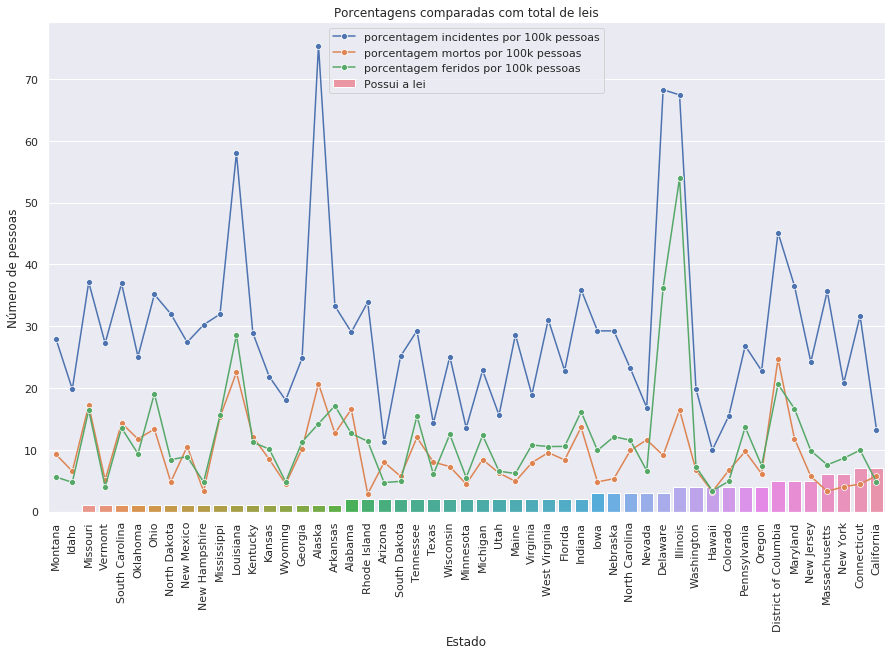

In [74]:
plot_column('total_leis', states)

#### O total de leis em si não apresenta uma relação, iremos olhar dentre as 7 leis se alguma individual afeta mais.O

### Red Flag Laws

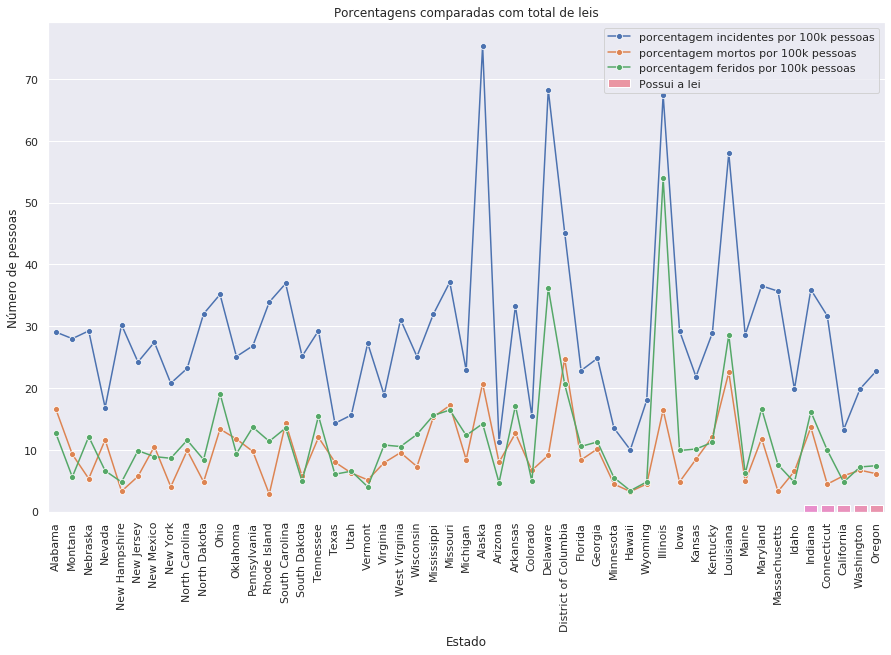

In [75]:
plot_column('Red Flag Laws', states)

#### Para a lei de Red Flag, n existe uma relação clara.

### Relinquishment Laws	

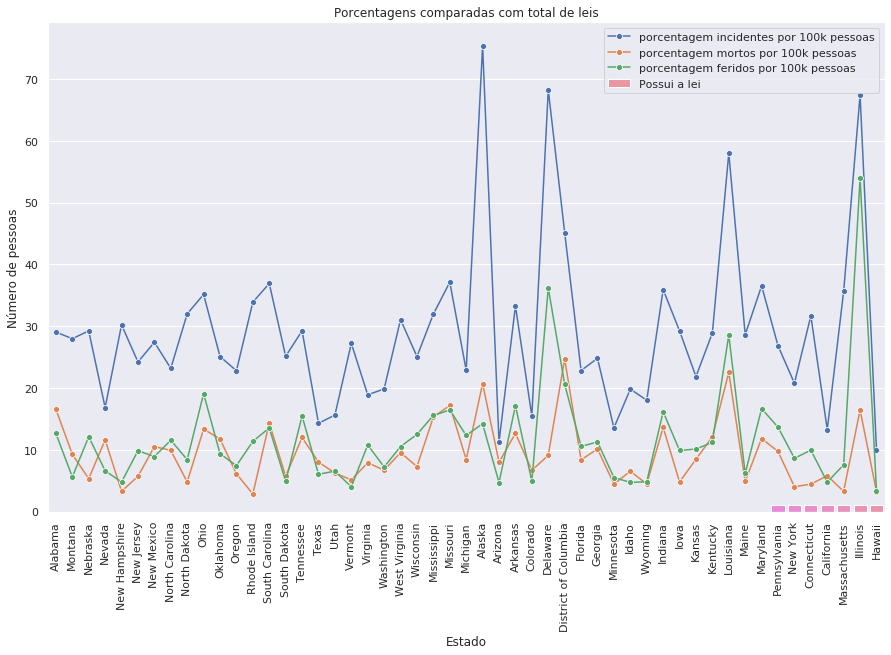

In [76]:
plot_column('Relinquishment Laws', states)

#### Para a lei de  Relinquishment Laws	, n existe uma relação clara.

### Assault Weapon Ban

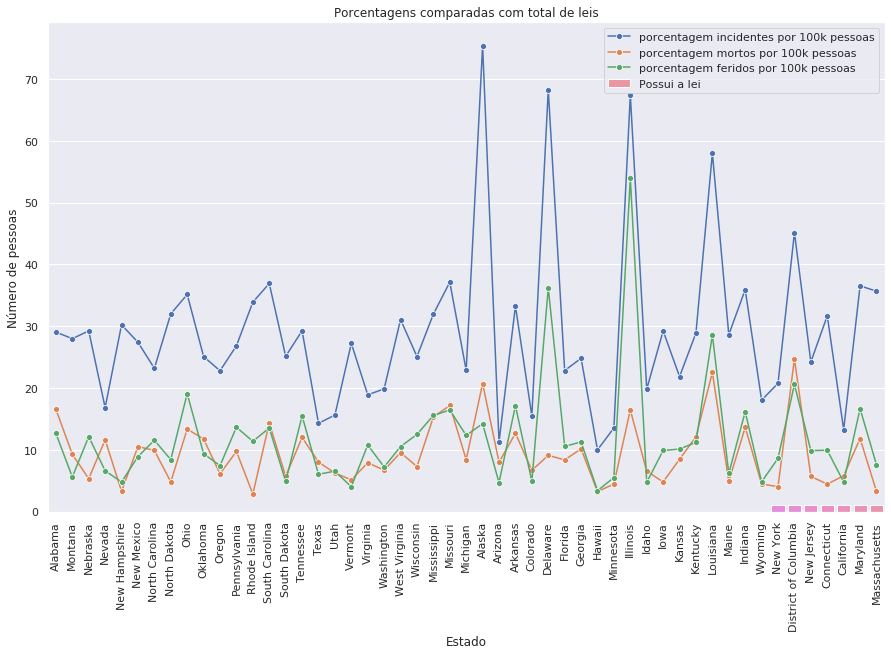

In [77]:
plot_column('Assault Weapon Ban', states)

#### Para a lei de Assault Weapon Ban	, n existe uma relação clara.

### High-Capacity Magazine ban

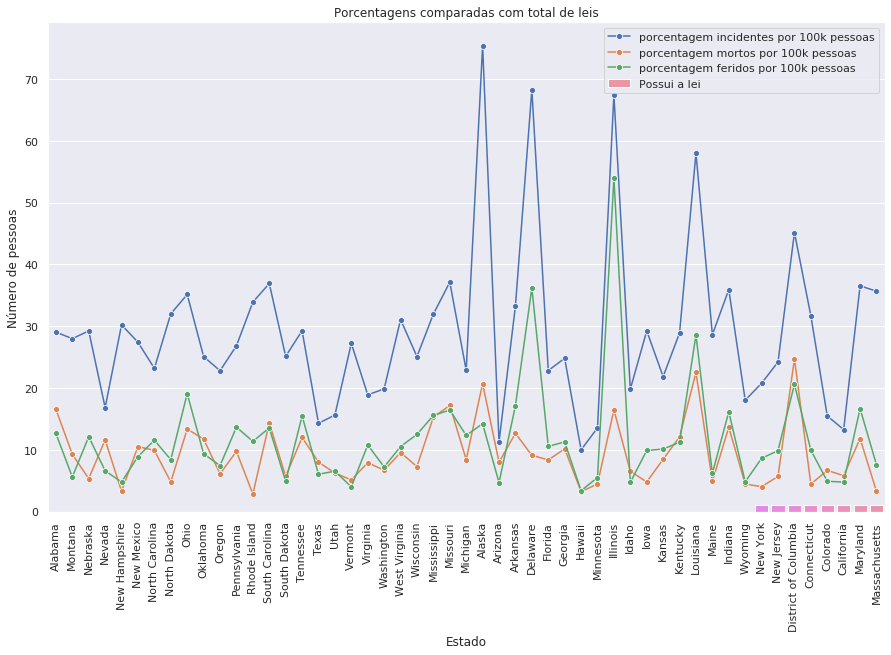

In [78]:
plot_column('High-Capacity Magazine ban', states)

#### Para a lei de   High-Capacity Magazine ban	, n existe uma relação clara.

### Prohibition for high-risk individuals

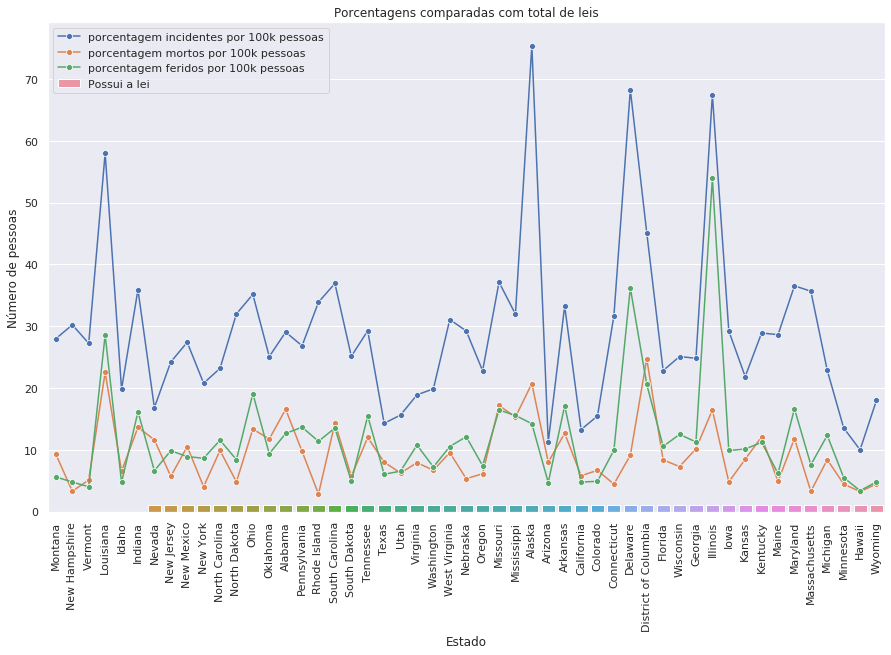

In [89]:
plot_column('Prohibition for high-risk individuals', states)

#### Para a lei de   Prohibition for high-risk individuals	, n existe uma relação clara.

### Prohibitions for individual with domestic violence covictions	

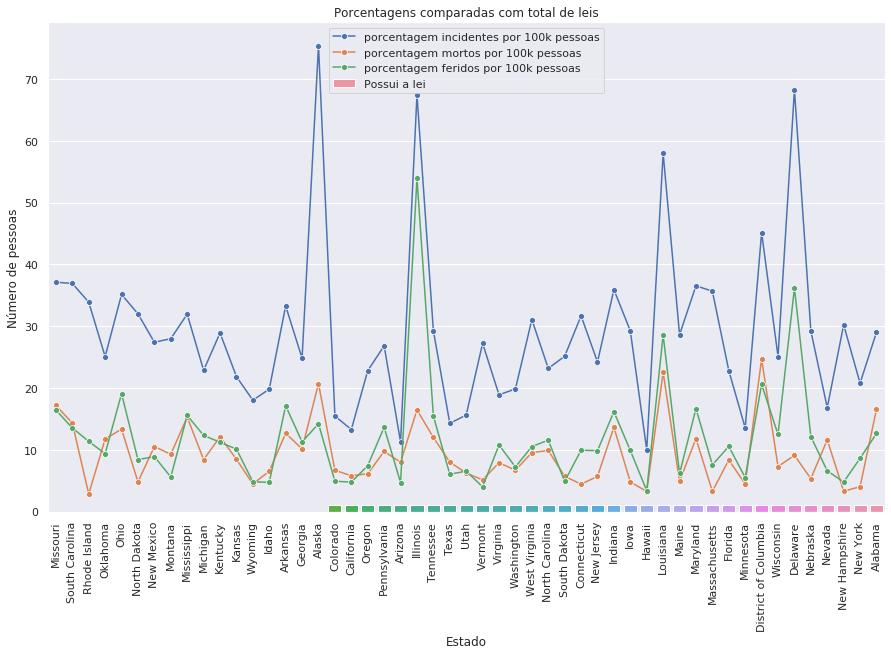

In [80]:
plot_column('Prohibitions for individual with domestic violence covictions', states)

#### Para a lei de Prohibitions for individual with domestic violence covictions, n existe uma relação clara.

### Mandatory universal background checks		

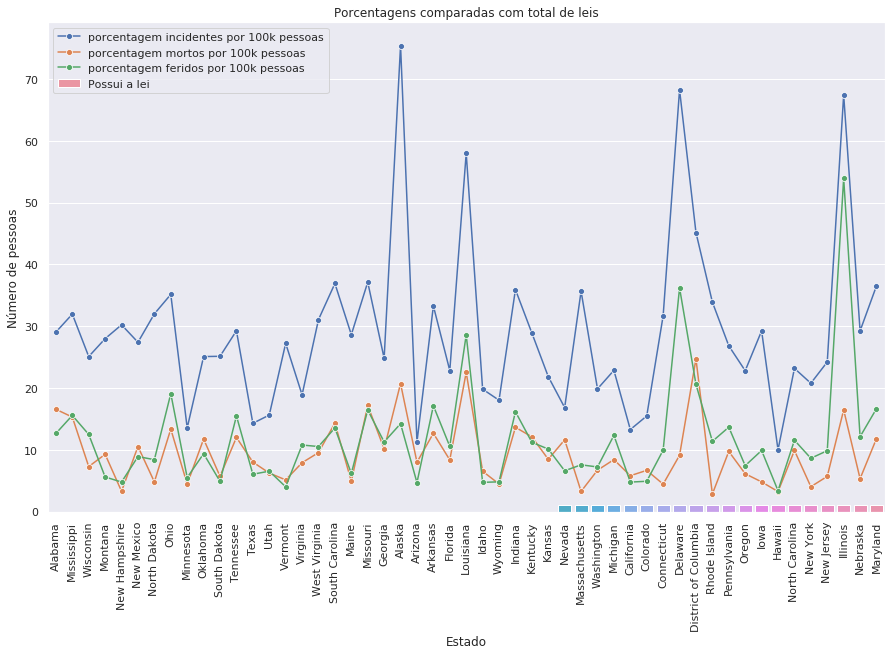

In [81]:
plot_column('Mandatory universal background checks', states)

#### Para a lei de Mandatory universal background checks, n existe uma relação clara.

Dentre todas as leis observadas, nenhuma e nem o total delas parece influenciar o número de incidentes.

## Teste 2